## More through analysis and building some helper functions

-import statements

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline

In [3]:
trainfile = '../data/raw/train.csv'
testfile = '../data/raw/test.csv'

In [4]:
df_train = pd.read_csv(trainfile)
df_test = pd.read_csv(testfile)

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Looking at both train and test sets to compare and get an idea of missing data

In [7]:
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
df_test.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

In [9]:
df_train.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [10]:
df_train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Building a helper function to get the title so it can be applied to both data sets

In [11]:

def get_title(df):
    df['Title']=df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
    return df
df_train = get_title(df_train)
df_test = get_title(df_test)

In [12]:
df_test['Title'].head()

0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Title, dtype: object

In [13]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [14]:
df_train.groupby('Title')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
Capt,1.0,70.000000,NaN,70.00,70.000,70.0,70.00,70.0
Col,2.0,58.000000,2.828427,56.00,57.000,58.0,59.00,60.0
Don,1.0,40.000000,NaN,40.00,40.000,40.0,40.00,40.0
Dr,6.0,42.000000,12.016655,23.00,35.000,46.5,49.75,54.0
Jonkheer,1.0,38.000000,NaN,38.00,38.000,38.0,38.00,38.0
Lady,1.0,48.000000,NaN,48.00,48.000,48.0,48.00,48.0
Major,2.0,48.500000,4.949747,45.00,46.750,48.5,50.25,52.0
Master,36.0,4.574167,3.619872,0.42,1.000,3.5,8.00,12.0
Miss,146.0,21.773973,12.990292,0.75,14.125,21.0,30.00,63.0


Describing each of the titles gives an idea of the average age for the data we have. Counting (below) shows how many of each title we are missing.

In [15]:
missingAge=df_train[df_train['Age'].isnull()]
missingAge.groupby('Title')['PassengerId'].count()

Title
Dr          1
Master      4
Miss       36
Mr        119
Mrs        17
Name: PassengerId, dtype: int64

Buiding helper functions to 
1. make an array of the known ages to have a sample to draw from
2. draw a random age from the sample
3. impute a new age both from the random sample and from the mean ages

In [16]:
#Fill missing age data in two ways: Random choices from a distribution according to title (Simple random imputation),
#and according to means grouped by title

#Make arrays of all the known ages from each "title" group
def age_array(Title, df):
    ages = df.loc[(df['Title']==Title),'Age'].tolist()
    ages = [x for x in ages if str(x) != 'nan']
    return ages

#Drawing a random age from the distribution of ages for every person according to Title
def draw_rand(Title, df):
    return df.loc[(df['Title']==Title),'Age_rand'].apply(lambda x: np.random.choice( np.array(age_array(Title,df))))
    

def imputate_age(df):
    
    #Replace the rarer titles with a common "other" title
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
    #Calculate means of ages grouped by title
    means = df.groupby('Title', as_index=False).agg(
                      {'Age':['mean','std']})
    means.columns=['Title','Age_mean',"Age_std"]
    means=means.set_index('Title')
    
    
    #Make new column drawing a random age from the distribution of ages for every person according to Title
    
    df['Age_rand']=df['Age']
    
    for Title in df['Title'].unique():
        df.loc[(df['Title']==Title),'Age_rand']=draw_rand(Title, df)
    
    #Make a column which chooses from "Age" if known, or "Age_rand" if unknown
    df['Age_mod_rand']=np.where(df['Age'].isnull(),df['Age_rand'],df['Age'])
    
    #Choose from means instead of random
    df['Age_mod_mean']=df['Age']
    for title in df["Title"].unique():
        df.loc[(df["Title"]==title)&(df['Age_mod_mean'].isnull()),['Age_mod_mean']]= means.loc[title,'Age_mean']
    return df

In [17]:
df_train = imputate_age(df_train)
df_test = imputate_age(df_test)

Compare the data from the original "age" column, the modified by "random" sampling column and the modified by "mean" column

In [18]:
df_train[['Age','Age_mod_rand','Age_mod_mean']].describe()

,Age,Age_mod_rand,Age_mod_mean
count,714.000000,891.000000,891.000000
mean,29.699118,29.936779,29.760121
std,14.526497,14.700353,13.279506
min,0.420000,0.420000,0.420000
25%,20.125000,21.000000,21.845638
50%,28.000000,28.000000,30.000000
75%,38.000000,39.000000,35.788991
max,80.000000,80.000000,80.000000


In [19]:
df_test[['Age','Age_mod_rand','Age_mod_mean']].describe()

,Age,Age_mod_rand,Age_mod_mean
count,332.000000,418.000000,418.000000
mean,30.272590,30.536890,30.190863
std,14.181209,13.885593,13.016601
min,0.170000,0.170000,0.170000
25%,21.000000,21.000000,21.831133
50%,27.000000,28.000000,30.000000
75%,39.000000,40.000000,36.875000
max,76.000000,76.000000,76.000000


In [20]:
df_test[df_test['Age_rand'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_rand,Age_mod_rand,Age_mod_mean


In [21]:
df_train['Age_mod_rand'].plot.hist(alpha = 0.3, color='tab:orange',bins=20)
df_train['Age_mod_mean'].plot.hist(alpha = 0.3, color='tab:blue',bins=20)
df_train['Age'].plot.hist(alpha = 0.3, color='tab:green',bins=20)
plt.legend(['Age_mod_rand','Age_mod_mean','Age'])


Visualizing the difference in Age data. The 'rand' age matches the distribution more accurately.

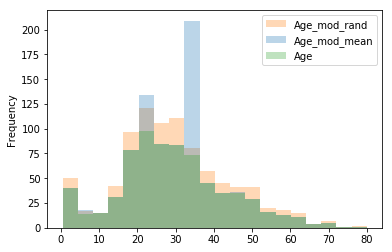

In [22]:
plt.show()

Build a helper fuction to separate "Age" into categories and compare between random and mean ages. This may not be better for modeling, but it gives some qualitative descriptions which are more intuitive.

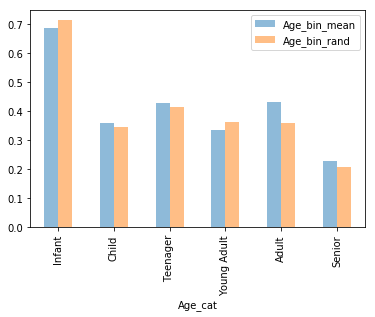

In [23]:
def cut_age(df, colName, cutPoints, labels,suffix):
    df['Age_bin_'+str(suffix)]=pd.cut(df[colName],cutPoints,labels=labels)
    return df

cutPoints =[0,5,12,18,35,60,100]
labels = ["Infant","Child","Teenager","Young Adult","Adult","Senior"]

df_train = cut_age(df_train,'Age_mod_rand',cutPoints,labels,"rand")
df_train = cut_age(df_train,'Age_mod_mean',cutPoints,labels,"mean")

df_test = cut_age(df_test,'Age_mod_rand',cutPoints,labels,"rand")
df_test = cut_age(df_test,'Age_mod_mean',cutPoints,labels,"mean")


#plot
pivot1 = df_train.pivot_table(index="Age_bin_mean",values='Survived')
pivot2 = df_train.pivot_table(index="Age_bin_rand",values='Survived')
pivot_data=pivot1
pivot_data['Age_bin_mean']=pivot1['Survived']
pivot_data['Age_bin_rand']=pivot2['Survived']
pivot_data.index.names = ['Age_cat']
pivot_data.drop('Survived',axis=1,inplace=True)
pivot_data.plot.bar(alpha=0.5)
plt.show()



In [24]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_rand,Age_mod_rand,Age_mod_mean,Age_bin_rand,Age_bin_mean
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,18.0,38.0,38.0,Adult,Adult
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,33.0,62.0,62.0,Senior,Senior


In [25]:
most_embarked = df_train.Embarked.dropna().mode()[0]
most_embarked

'S'

Fill any missing 'Embarked' data with the most common port

In [26]:
df_train['Embarked'] = df_train['Embarked'].fillna(most_embarked)
df_test['Embarked'] = df_test['Embarked'].fillna(most_embarked)

Make a helper function to add all of the dummy variables from the different categories and to add a new variable "Family size" as well as an Intercept column "Eins" (for modeling with statsmodels since it doesn't include an intercept by default)

In [27]:
def model_vars(df):
    df["Female"]=np.where(df['Sex']=='female',1,0)
    
    #assign dummies to categories
    pclass = pd.get_dummies(df['Pclass'],prefix='class')
    df = df.join(pclass,how='outer')
    df.head()
    
    embarked = pd.get_dummies(df['Embarked'], prefix = 'from')
    df = df.join(embarked,how='outer')
    
    ages1 = pd.get_dummies(df['Age_bin_rand'],prefix='inAge_rand')
    ages2 = pd.get_dummies(df['Age_bin_mean'],prefix='inAge_mean')
    df = df.join(ages1,how='outer')
    df = df.join(ages2,how='outer')
    
    #set new family size variable
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    
    #include constant term for stats models regression
    df['Eins']=1.0
    return df

In [28]:
df_train = model_vars(df_train)
df_test = model_vars(df_test)

In [29]:
import statsmodels.api as sm

/Users/CodyGette/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [30]:
df_train.columns.values.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Title',
 'Age_rand',
 'Age_mod_rand',
 'Age_mod_mean',
 'Age_bin_rand',
 'Age_bin_mean',
 'Female',
 'class_1',
 'class_2',
 'class_3',
 'from_C',
 'from_Q',
 'from_S',
 'inAge_rand_Infant',
 'inAge_rand_Child',
 'inAge_rand_Teenager',
 'inAge_rand_Young Adult',
 'inAge_rand_Adult',
 'inAge_rand_Senior',
 'inAge_mean_Infant',
 'inAge_mean_Child',
 'inAge_mean_Teenager',
 'inAge_mean_Young Adult',
 'inAge_mean_Adult',
 'inAge_mean_Senior',
 'FamilySize',
 'Eins']

Run some test models to compare class, sex, family size, age and other variables

In [31]:
predictors = ['class_1','class_2','Female','Eins']
X = df_train[predictors]
y = df_train['Survived']
    
logit = sm.Logit(y, X)
result_rand = logit.fit()


predictors2 = ['class_1','class_2','Female','Eins']
X2 = df_train[predictors2]
y2 = df_train['Survived']
    
logit = sm.Logit(y2, X2)
result_mean = logit.fit()


Optimization terminated successfully.
         Current function value: 0.464023
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.464023
         Iterations 6


In [32]:
result_rand.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Sun, 18 Mar 2018   Pseudo R-squ.:                  0.3032
Time:                        16:15:00   Log-Likelihood:                -413.44
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.145e-77
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
class_1        1.9055      0.214      8.898      0.000       1.486       2.325
class_2        1.0675      0.220      4.842      0.000       0.635       1.500
Female         2.6419      0.184     14.350      0.000       2.281       3.003
Eins          -2.2502      0.159    -14.163      0.000      -2.562      -1.939
==============================================================================
"""

In [33]:
result_mean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Sun, 18 Mar 2018   Pseudo R-squ.:                  0.3032
Time:                        16:15:02   Log-Likelihood:                -413.44
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.145e-77
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
class_1        1.9055      0.214      8.898      0.000       1.486       2.325
class_2        1.0675      0.220      4.842      0.000       0.635       1.500
Female         2.6419      0.184     14.350      0.000       2.281       3.003
Eins          -2.2502      0.159    -14.163      0.000      -2.562      -1.939
==============================================================================
"""

In [34]:
predictors = ['class_1','class_2','Female',"FamilySize",'Eins']
X = df_train[predictors]
y = df_train['Survived']
    
logit = sm.Logit(y, X)
result_rand = logit.fit()


predictors2 = ['class_1','class_2','Female',"FamilySize",'Eins']
X2 = df_train[predictors2]
y2 = df_train['Survived']
    
logit = sm.Logit(y2, X2)
result_mean = logit.fit()




Optimization terminated successfully.
         Current function value: 0.460224
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.460224
         Iterations 6


In [35]:
result_rand.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Sun, 18 Mar 2018   Pseudo R-squ.:                  0.3089
Time:                        16:15:03   Log-Likelihood:                -410.06
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 4.711e-78
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
class_1        1.8735      0.215      8.705      0.000       1.452       2.295
class_2        1.0258      0.222      4.622      0.000       0.591       1.461
Female         2.7767      0.195     14.240      0.000       2.395       3.159
FamilySize    -0.1504      0.060     -2.513      0.012      -0.268      -0.033
Eins          -1.9932      0.185    -10.788      0.000      -2.355      -1.631
==============================================================================
"""

In [36]:
result_mean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Sun, 18 Mar 2018   Pseudo R-squ.:                  0.3089
Time:                        16:15:04   Log-Likelihood:                -410.06
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 4.711e-78
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
class_1        1.8735      0.215      8.705      0.000       1.452       2.295
class_2        1.0258      0.222      4.622      0.000       0.591       1.461
Female         2.7767      0.195     14.240      0.000       2.395       3.159
FamilySize    -0.1504      0.060     -2.513      0.012      -0.268      -0.033
Eins          -1.9932      0.185    -10.788      0.000      -2.355      -1.631
==============================================================================
"""

In [40]:
predictors = ['class_1','class_2','Female',"FamilySize",'inAge_rand_Infant',
 'inAge_rand_Child',
 'inAge_rand_Teenager',
 'inAge_rand_Young Adult',
 'inAge_rand_Adult','from_C','from_Q','Eins']
X = df_train[predictors]
y = df_train['Survived']
    
logit = sm.Logit(y, X)
result_rand = logit.fit()


predictors2 = ['class_1','class_2','Female',"FamilySize",'inAge_mean_Infant',
 'inAge_mean_Child',
 'inAge_mean_Teenager',
 'inAge_mean_Young Adult',
 'inAge_mean_Adult','from_C','from_Q','Eins']
X2 = df_train[predictors2]
y2 = df_train['Survived']
    
logit = sm.Logit(y2, X2)
result_mean = logit.fit()

Optimization terminated successfully.
         Current function value: 0.427058
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.426805
         Iterations 6


In [41]:
result_rand.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      879
Method:                           MLE   Df Model:                           11
Date:                Sun, 18 Mar 2018   Pseudo R-squ.:                  0.3587
Time:                        16:15:41   Log-Likelihood:                -380.51
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 2.189e-84
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
class_1                    2.2225      0.251      8.837      0.000       1.730       2.715
class_2                    1.1741      0.239      4.922      0.000       0.707       1.642
Female                     2.8568      0.210     13.578      0.000       2.444       3.269
FamilySize                -0.3272      0.080     -4.067      0.000      -0.485      -0.170
inAge_rand_Infant          3.5791      0.712      5.025      0.000       2.183       4.975
inAge_rand_Child           1.9735      0.801      2.464      0.014       0.404       3.544
inAge_rand_Teenager        0.8199      0.622      1.319      0.187      -0.398       2.038
inAge_rand_Young Adult     1.0358      0.561      1.845      0.065      -0.065       2.136
inAge_rand_Adult           0.5436      0.563      0.965      0.335      -0.560       1.647
from_C                     0.4693      0.238      1.973      0.048       0.003       0.935
from_Q                     0.2789      0.350      0.798      0.425      -0.406       0.964
Eins                      -2.9721      0.577     -5.153      0.000      -4.103      -1.842
==========================================================================================
"""

In [42]:
result_mean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      879
Method:                           MLE   Df Model:                           11
Date:                Sun, 18 Mar 2018   Pseudo R-squ.:                  0.3591
Time:                        16:15:43   Log-Likelihood:                -380.28
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.756e-84
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
class_1                    2.2117      0.253      8.749      0.000       1.716       2.707
class_2                    1.1555      0.241      4.797      0.000       0.683       1.628
Female                     2.9623      0.213     13.909      0.000       2.545       3.380
FamilySize                -0.3424      0.080     -4.263      0.000      -0.500      -0.185
inAge_mean_Infant          4.0219      0.778      5.172      0.000       2.498       5.546
inAge_mean_Child           2.1466      0.844      2.544      0.011       0.493       3.800
inAge_mean_Teenager        1.0612      0.698      1.521      0.128      -0.306       2.428
inAge_mean_Young Adult     1.1179      0.616      1.816      0.069      -0.089       2.325
inAge_mean_Adult           0.7669      0.622      1.234      0.217      -0.451       1.985
from_C                     0.4721      0.239      1.979      0.048       0.004       0.940
from_Q                     0.3379      0.336      1.004      0.315      -0.321       0.997
Eins                      -3.1363      0.635     -4.939      0.000      -4.381      -1.892
==========================================================================================
"""

In [49]:
predictors = ['class_1','class_2','Female',"FamilySize",'inAge_rand_Infant',
 'inAge_rand_Child', 'inAge_rand_Young Adult','from_C','Eins']
X = df_train[predictors]
y = df_train['Survived']
    
logit = sm.Logit(y, X)
result_rand = logit.fit()


predictors2 = ['class_1','class_2','Female',"FamilySize",'inAge_mean_Infant',
 'inAge_mean_Child', 'inAge_mean_Young Adult','from_C','Eins']
X2 = df_train[predictors2]
y2 = df_train['Survived']
    
logit = sm.Logit(y2, X2)
result_mean = logit.fit()

Optimization terminated successfully.
         Current function value: 0.428502
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.428744
         Iterations 6


In [44]:
result_rand.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Sun, 18 Mar 2018   Pseudo R-squ.:                  0.3565
Time:                        16:16:11   Log-Likelihood:                -381.80
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 2.172e-86
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
class_1                    2.1181      0.239      8.858      0.000       1.649       2.587
class_2                    1.1158      0.230      4.841      0.000       0.664       1.568
Female                     2.9199      0.207     14.093      0.000       2.514       3.326
FamilySize                -0.3337      0.080     -4.176      0.000      -0.490      -0.177
inAge_rand_Infant          2.9945      0.469      6.381      0.000       2.075       3.914
inAge_rand_Child           1.3502      0.594      2.271      0.023       0.185       2.515
inAge_rand_Young Adult     0.4433      0.198      2.239      0.025       0.055       0.831
from_C                     0.4787      0.233      2.055      0.040       0.022       0.935
Eins                      -2.3350      0.243     -9.595      0.000      -2.812      -1.858
==========================================================================================
"""

In [45]:
result_mean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Sun, 18 Mar 2018   Pseudo R-squ.:                  0.3571
Time:                        16:16:19   Log-Likelihood:                -381.45
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 1.539e-86
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
class_1                    2.0917      0.239      8.746      0.000       1.623       2.560
class_2                    1.0589      0.232      4.569      0.000       0.605       1.513
Female                     3.0187      0.210     14.351      0.000       2.606       3.431
FamilySize                -0.3539      0.080     -4.424      0.000      -0.511      -0.197
inAge_mean_Infant          3.2504      0.500      6.500      0.000       2.270       4.230
inAge_mean_Child           1.3305      0.596      2.231      0.026       0.162       2.499
inAge_rand_Young Adult     0.3977      0.196      2.024      0.043       0.013       0.783
from_C                     0.4480      0.235      1.908      0.056      -0.012       0.908
Eins                      -2.2679      0.240     -9.442      0.000      -2.739      -1.797
==========================================================================================
"""

In [48]:
cols_to_keep_train = ['PassengerId',
 'Survived',
 'class_1','class_2',
 'Name',
 'Female',"FamilySize",'inAge_rand_Infant',
 'inAge_rand_Child',
 'inAge_rand_Teenager',
 'inAge_rand_Young Adult',
 'inAge_rand_Adult',
 'inAge_rand_Senior',
 'inAge_mean_Infant',
 'inAge_mean_Child',
 'inAge_mean_Teenager',
 'inAge_mean_Young Adult',
 'inAge_mean_Adult',
 'inAge_mean_Senior','from_C','Eins']

cols_to_keep_test = ['PassengerId',
 'class_1','class_2',
 'Name',
 'Female',"FamilySize",'inAge_rand_Infant',
 'inAge_rand_Child',
 'inAge_rand_Teenager',
 'inAge_rand_Young Adult',
 'inAge_rand_Adult',
 'inAge_rand_Senior',
 'inAge_mean_Infant',
 'inAge_mean_Child',
 'inAge_mean_Teenager',
 'inAge_mean_Young Adult',
 'inAge_mean_Adult',
 'inAge_mean_Senior','from_C','Eins']

In [47]:
data_out_train = df_train[cols_to_keep_train]
data_out_test = df_test[cols_to_keep_test]